In [1]:
import pandas as pd
from topic_modeling import *

## AG News Dataset

In [4]:
ag_test = pd.read_csv('../data/AG News/test.csv')
ag_train = pd.read_csv('../data/AG News/train.csv')

# Define the mapping
class_mapping = {1: "World", 2: "Sports", 3: "Business", 4: "Science"}

# Apply the mapping to the class column
ag_test['Class'] = ag_test['Class Index'].replace(class_mapping)
ag_train['Class'] = ag_train['Class Index'].replace(class_mapping)
ag_test['Preprocessed'] = ag_test['Description'].apply(process_text)
ag_news_input_doc = ag_test['Description']
ag_news_true_labels = ag_test['Class Index']
ag_news = {"AG News":(ag_news_input_doc, ag_news_true_labels),
           "AG News 2":(ag_news_input_doc, ag_news_input_doc)}

In [5]:
orchestrator = TopicModelOrchestrator()

orchestrator.add_models_grid(
    model_types=['LDA', 'LSI', 'NMF'],
    param_grid={'n_topics': [4]}
)

['LDA_4', 'LSI_4', 'NMF_4']

In [6]:
results = orchestrator.evaluate_all(ag_news)
print(results)

Evaluating models on dataset: AG News
  Evaluated model: LDA_4
  Evaluated model: LSI_4
  Evaluated model: NMF_4
Evaluating models on dataset: AG News 2
  Evaluated model: LDA_4
  Evaluated model: LSI_4
  Evaluated model: NMF_4
{'AG News':        ARI Score  Topic Coherence  Cosine Similarity  Reconstruction Error  \
LDA_4   0.154719         0.533687           0.389324                   NaN   
LSI_4   0.111348         0.631264           0.564310                   NaN   
NMF_4   0.405050         0.722596           0.473902              86.28456   

       Model  Dataset  
LDA_4  LDA_4  AG News  
LSI_4  LSI_4  AG News  
NMF_4  NMF_4  AG News  , 'AG News 2':           ARI Score  Topic Coherence  Cosine Similarity  Reconstruction Error  \
LDA_4  1.243509e-06         0.533687           0.389324                   NaN   
LSI_4  2.678837e-07         0.631264           0.564310                   NaN   
NMF_4  1.045500e-06         0.722596           0.473902              86.28456   

       Model

In [7]:
best_models = orchestrator.get_best_models_by_dataset("Topic Coherence")
for dataset, (model_name, _) in best_models.items():
    print(f"Best model for {dataset}: {model_name}")

Best model for AG News: NMF_4
Best model for AG News 2: NMF_4


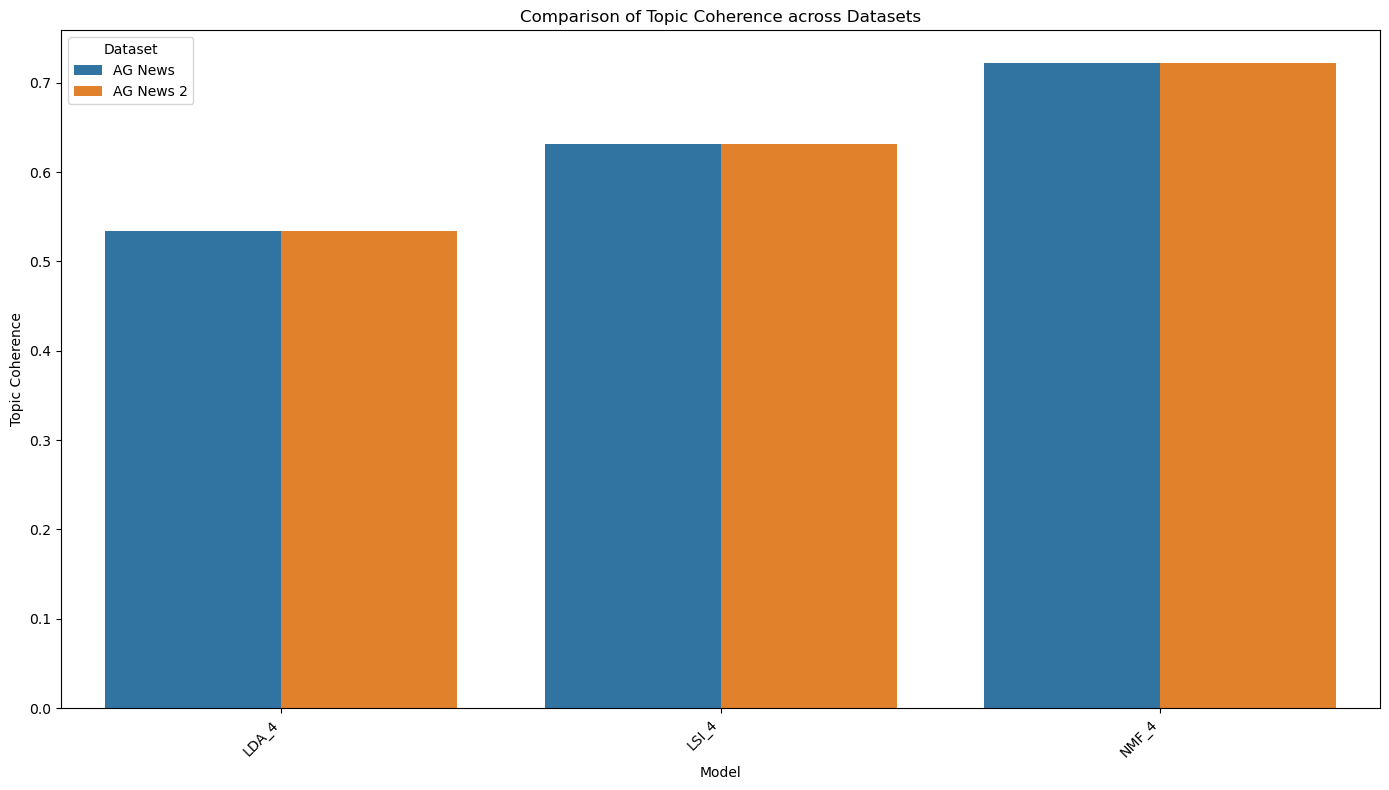

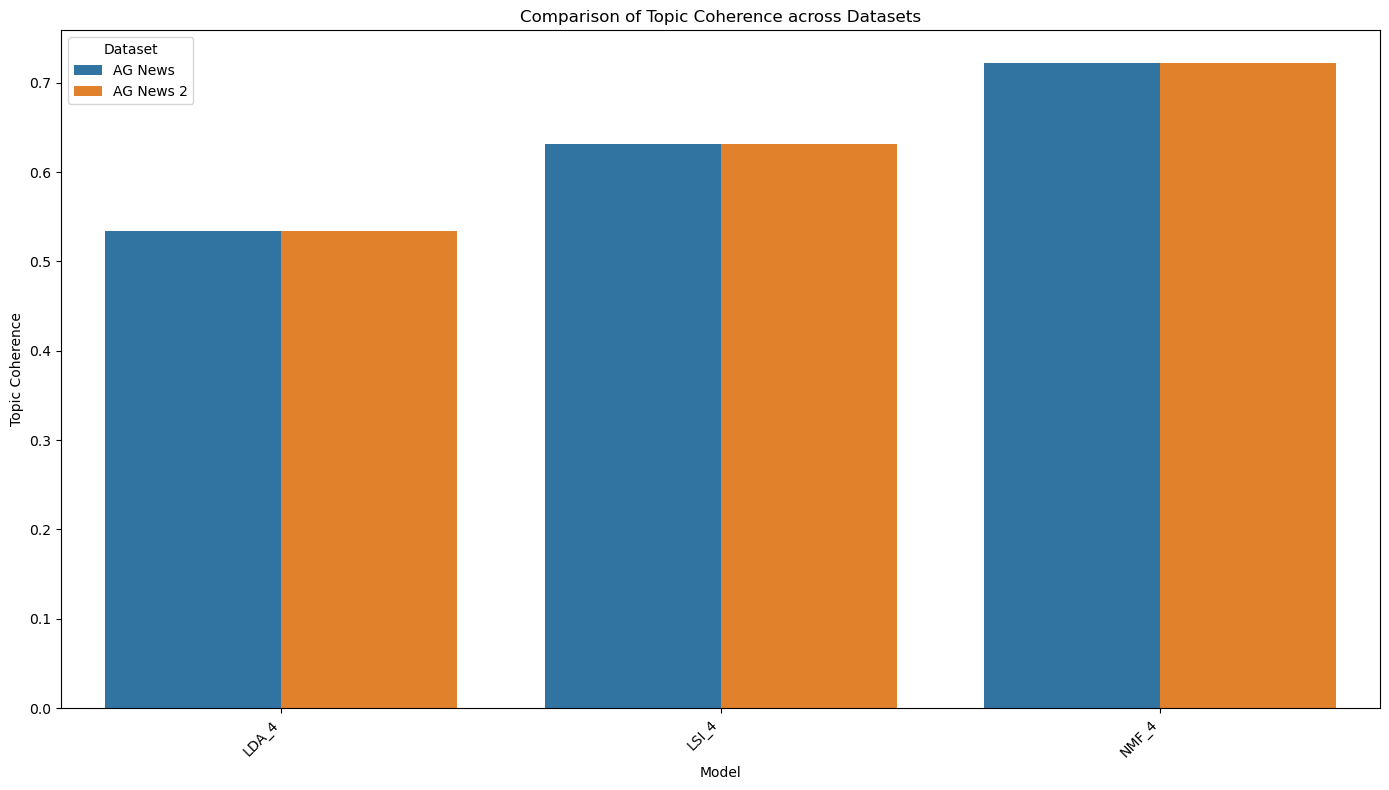

In [8]:
orchestrator.compare_datasets("Topic Coherence")

TypeError: Neither the `x` nor `y` variable appears to be numeric.

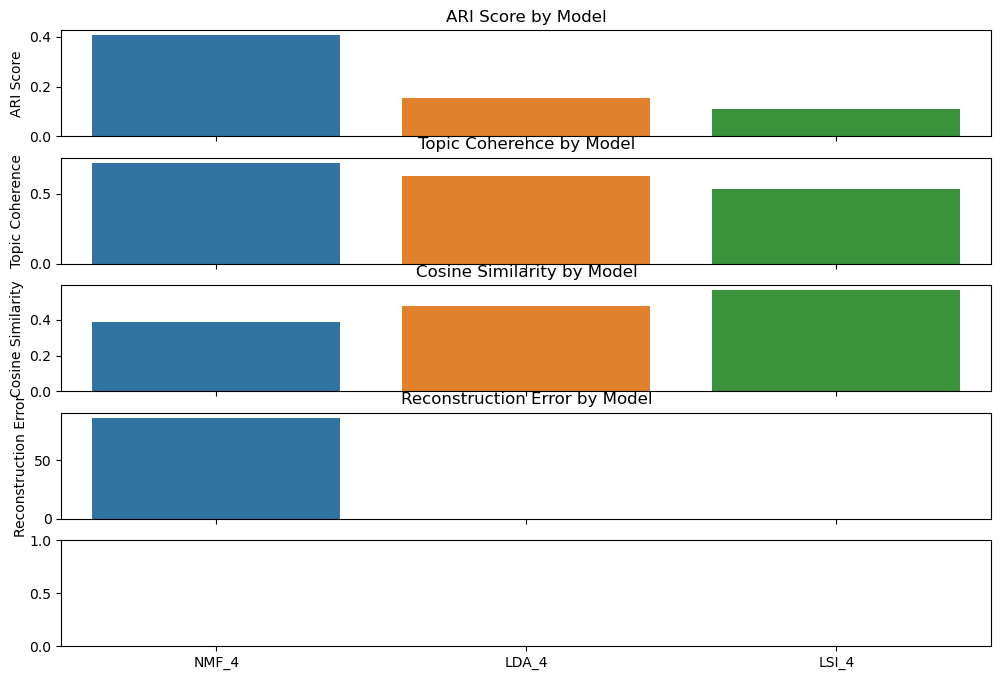

In [9]:
orchestrator.visualize_results_by_dataset(dataset_name="AG News")